In [1]:
import numpy as np
import scipy as sp
from qutip import *
from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import *

## Single resonator

0.9796010365329367


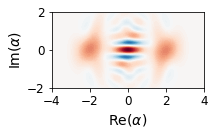

In [2]:
from cvqaoa.cvdevice import KPOProcessor
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
## One resonator
n = 1

N = 12 # Hilbert space cut-off
a = destroy(N) # Annihilation operator
eye = qeye(N) # Identity operator

## Parameters
K = 1 # Kerr amplitude
G = 4 # Two-photon drive amplitude (in units of K)
alpha = np.sqrt(G/K) # Coherent state amplitude
J = 1/2
h = 1/2
g = J/(2*alpha**2) # Resonator coupling strength (in units of K)
E = h/(2*alpha) # Single-photon drive amplitude (in units of K)
Delta = 1 # Detuning (in units of K)

H0 = -Delta*a.dag()*a - K*a.dag()**2*a**2
H1 = -K*a.dag()**2*a**2 + G*(a.dag()**2 + a**2)

## Angles
x = np.array([0.2292,0.2207,0.6725,0.0444])

s = basis(N,0)
state = (-1j*x[3]*H0).expm()*((-1j*x[1]*H1).expm()*((-1j*x[2]*H0).expm()*((-1j*x[0]*H1).expm()*s)))

xvec = np.linspace(-4, 4, 400); yvec = np.linspace(-2, 2, 200)
W = wigner(state,xvec,yvec,'iterative',2)
nrm = mpl.colors.Normalize(-W.max(), W.max()) # Normalize colors

# contour plot
plt.subplot(121,aspect='equal')
im = plt.contourf(xvec, yvec, W, 100, cmap = cm.RdBu_r, norm = nrm) # density plot
plt.xlabel(r'Re$(\alpha)$', fontsize = 14)
plt.ylabel(r'Im$(\alpha)$', fontsize = 14)
plt.xticks(np.arange(min(xvec),max(xvec)+1,2),fontsize = 12)
plt.yticks(np.arange(min(yvec),max(yvec)+1,2),fontsize = 12)

cat_plus = (coherent(N,alpha) + coherent(N,-alpha)).unit()
print(fidelity(state,cat_plus))

## Two resonators

In [15]:
N = 10 # Hilbert space cut-off
a = destroy(N) # Annihilation operator
eye = qeye(N) # Identity operator

## Combinatorial optimization problem input
n = 2 # Number of qubits
J = -np.array([[0,.5],[.5,0]])
h = -np.array([.5,0])

## Parameters
K = 1 # Kerr amplitude
G = 4 # Two-photon drive amplitude (in units of K)
alpha = np.sqrt(G/K) # Coherent state amplitude
g = J/(2*alpha**2) # Resonator coupling strength (in units of K)
E = h/(2*alpha) # Single-photon drive amplitude (in units of K)
Delta = 1 # Detuning (in units of K)

## Hamiltonians
H0 = 0 # Mixer Hamiltonian
H1 = 0 # Cost Hamiltonian
H_coupling = 0 # Coupling Hamiltonian

for i in range(n):
    b = tensor([a if i==j else eye for j in range(n)]) # Annihilation operator for the i:th resonator
    H0 += -Delta*b.dag()*b - K*b.dag()**2*b**2
    H1 += -K*b.dag()**2*b**2 + G*(b.dag()**2 + b**2) + E[i]*(b.dag() + b)

if n>1:
    for i in range(n-1):
        b1 = tensor([a if i == k else eye for k in range(n)])
        for j in range(i+1,n):
            b2 = tensor([a if j == k else eye for k in range(n)])
            H_coupling = g[i,j]*(b1.dag()*b2 + b2.dag()*b1)
        
H0 += H_coupling
H1 += H_coupling

In [45]:
## Computational basis states
alpha_plus = coherent(N,alpha)
alpha_minus = coherent(N,-alpha)
cat_plus = (alpha_plus + alpha_minus).unit()
cat_minus = (alpha_plus - alpha_minus).unit()
ket0 = (cat_plus + cat_minus)/np.sqrt(2) # logical zero state
ket1 = (cat_plus - cat_minus)/np.sqrt(2) # logical one state
kets = [ket0, ket1] # array with the two logical states
I = tensor([(ket0*ket0.dag() + ket1*ket1.dag()) for i in range(n)]) # Identity operator

## Create state
vac = tensor([basis(N,0) for i in range(n)]) # vacuum
def var_state(gamma,beta):
    return (-1j*beta*H0).expm()*(-1j*gamma*H1).expm()*vac

## Basis states
def ket(x):
    return tensor([kets[i] for i in x])

In [20]:
b = ket([0,0])
b.dag()*I*(-H1)*I*b

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-29.23844183]]

In [21]:
b = ket([1,0])
b.dag()*I*(-H1)*I*b

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-31.18218735]]

In [23]:
b = ket([0,1])
b.dag()*I*(-H1)*I*b

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-30.20105754]]

In [22]:
b = ket([1,1])
b.dag()*I*(-H1)*I*b

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-30.21957164]]